In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 29 ##

In [3]:
united = Table.read_table('united.csv')

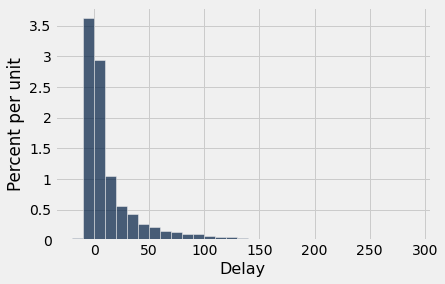

In [4]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [5]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [6]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [7]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [8]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.629687999999998
Population SD: 39.480199851609314
SD of sample means: 3.8876785338625934


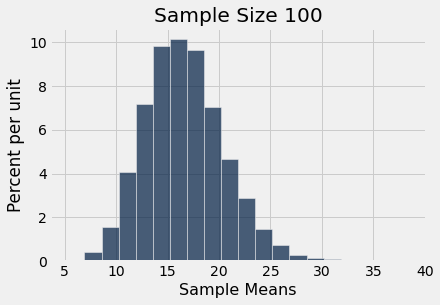

In [9]:
plot_sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.6420715
Population SD: 39.480199851609314
SD of sample means: 1.9368064720404436


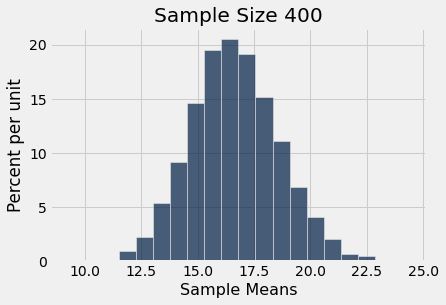

In [10]:
plot_sample_means(400)

Sample size:  900
Population mean: 16.658155515370705
Average of sample means:  16.673920888888887
Population SD: 39.480199851609314
SD of sample means: 1.3261662746849667


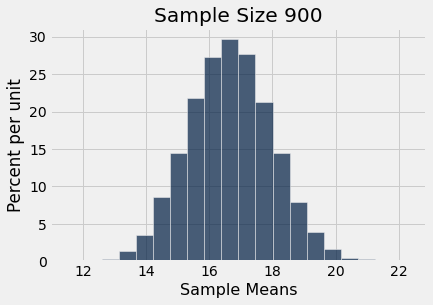

In [11]:
plot_sample_means(900)

## SD of the sample mean

In [12]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [13]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.94299,3.94802
150,3.17881,3.22354
200,2.76894,2.79167
250,2.51768,2.49695
300,2.29737,2.27939
350,2.10811,2.11031
400,1.9923,1.97401
450,1.85335,1.86111
500,1.76439,1.76561
550,1.69428,1.68344


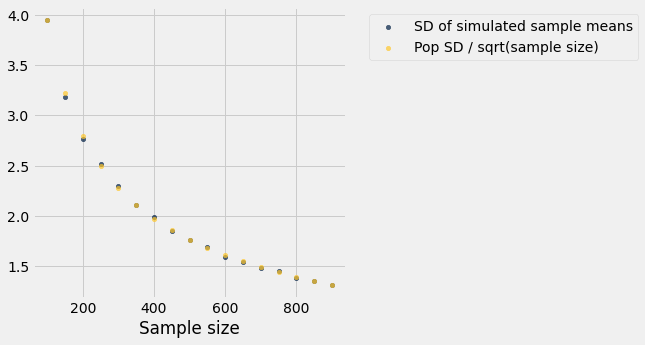

In [14]:
sd_table.scatter('Sample size')

## SD of 0/1 Population ##

In [15]:
# Population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.std(zero_one_population)

0.4000000000000001

In [17]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [18]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (10 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [19]:
poss_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 10
)

In [20]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

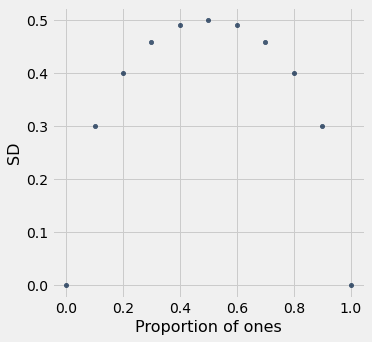

In [21]:
zero_one_pop.scatter('Proportion of ones', 'SD')